In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

from tensorflow.keras.preprocessing import image

Next code segment is utilizing DenseNet121 to predict any image of your choice. 

In [14]:
densenet = keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

Load in image and predict

In [15]:
image_path = r"C:\Users\jsedl\OneDrive\Documents\otter.jpg" #can input any image path here

image = keras.utils.load_img(image_path, target_size=(224, 224))
x = keras.utils.img_to_array(image)
x = np.expand_dims(x, axis=0)

features = densenet.predict(x)

1/1 [==============================] - 2s 2s/step


In [16]:
print(keras.applications.imagenet_utils.decode_predictions(features))

[[('n03220513', 'dome', 0.94183785), ('n03530642', 'honeycomb', 0.057904407), ('n03956157', 'planetarium', 0.00014567922), ('n03481172', 'hammer', 7.345554e-05), ('n04208210', 'shovel', 3.2928823e-05)]]


Next code segment is utlizing feature extraction to better predict photo classification of dogs and cats. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

Next code segment is loading in the data

In [18]:
X = np.load(r'C:\Users\jsedl\Downloads\cats_vs_dog_data\cat_vs_dog_data\X_cat_vs_dog.npz')['arr_0']
Y = np.load(r'C:\Users\jsedl\Downloads\cats_vs_dog_data\cat_vs_dog_data\Y_cat_vs_dog.npz')['arr_0']

# Split train/test
x_train = X[0:500]
y_train = Y[0:500]
x_test = X[500:]
y_test = Y[500:]

# Flattens the images into the data-matrix format that most sklearn models accept
x_raw_train = x_train.flatten().reshape([x_train.shape[0], 200*200*3])
x_raw_test = x_test.flatten().reshape([x_test.shape[0], 200*200*3])

Next code segment extracts the features using DenseNet121 

In [19]:
from sklearn.feature_extraction import image



model2 = keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet"
)

x_train_FE = model2.predict(x_train)
x_test_FE = model2.predict(x_test)


16/16 [==============================] - 19s 1s/step


Next code segment we use the features and logistical regression model to make predictions and then we print the confusion matrix

C:\Users\jsedl\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


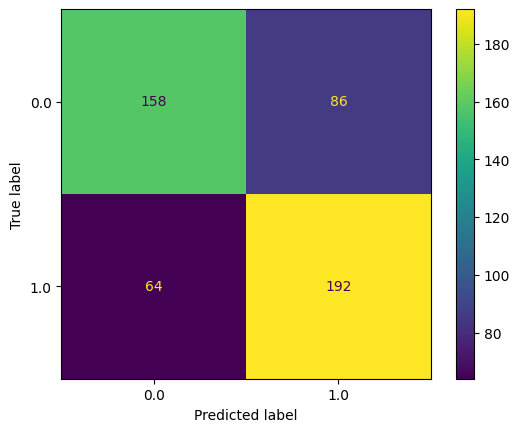

In [20]:
x_train_FE = x_train_FE.reshape(500, (6*6*1024))
x_test_FE = x_test_FE.reshape(500, (6*6*1024))
logistic = LogisticRegression(random_state=0).fit(x_train_FE, y_train)

preds = logistic.predict(x_test_FE)
cm = confusion_matrix(y_test, preds, labels=logistic.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logistic.classes_)
disp.plot()
plt.show()

Next code segment replaces the last layer (the output layer) with a new one. 

In [21]:
model3 = keras.applications.DenseNet121(
    include_top=False,
    weights = "imagenet",
     input_shape = (200,200,3)
    # input_tensor=None,
    # pooling=None,
    # classes=1000,
    # classifier_activation="softmax",
)

#printing output layer
print(model3.layers[-1].output)

flat1 = Flatten()(model3.layers[-1].output)
# class1 = Dense(1024, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(flat1)

model4 = keras.Model(inputs=model3.inputs, outputs=output)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")


In [22]:
#iterating through all layers but the last
for i in range(len(model4.layers)-1):
    layer = model4.layers[i]
    layer.trainable = False

model4.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")
model4.fit(x_train, y_train, batch_size=128,epochs = 15)

Epoch 1/15
4/4 [==============================] - 28s 5s/step - loss: 17.0533 - accuracy: 0.4580
Epoch 2/15
4/4 [==============================] - 35s 10s/step - loss: 11.7156 - accuracy: 0.5080
Epoch 3/15
4/4 [==============================] - 43s 11s/step - loss: 5.8937 - accuracy: 0.5640
Epoch 4/15
4/4 [==============================] - 42s 11s/step - loss: 4.3095 - accuracy: 0.6100
Epoch 5/15
4/4 [==============================] - 42s 10s/step - loss: 3.3824 - accuracy: 0.6660
Epoch 6/15
4/4 [==============================] - 45s 11s/step - loss: 2.8031 - accuracy: 0.6900
Epoch 7/15
4/4 [==============================] - 45s 11s/step - loss: 1.9730 - accuracy: 0.7400
Epoch 8/15
4/4 [==============================] - 45s 11s/step - loss: 1.3248 - accuracy: 0.7860
Epoch 9/15
4/4 [==============================] - 45s 11s/step - loss: 0.8667 - accuracy: 0.8040
Epoch 10/15
4/4 [==============================] - 45s 11s/step - loss: 0.7369 - accuracy: 0.8160
Epoch 11/15
4/4 [===========

In [23]:
model4.evaluate(x_test, y_test)

16/16 [==============================] - 62s 3s/step - loss: 1.8252 - accuracy: 0.6560


[1.8251523971557617, 0.656000018119812]